In [1]:
from larray import *

C:\Users\ald\Miniconda3\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
%matplotlib inline

# Basic input/output

In [3]:
a = read_csv('test3d.csv')

In [4]:
a

age | geo | sex\lipro |                  P01 |                 P02 |                 P03 |                  P04 | ... |                  P12 |                  P13 |                 P14 |                  P15
  0 | A11 |         H |   0.7986085756301988 |  0.1549669562142233 |  0.5594898172744543 |   0.6050998418360097 | ... |   0.6658148625080943 |   0.6351534719709239 |  0.7317499092988217 |   0.4763302905934093
  0 | A11 |         F |   0.7452292034514122 |  0.7245541585179216 |  0.1062878421822664 |   0.3611621321961279 | ... |   0.1939371867197549 |  0.18631785650755173 |  0.7588818357765889 |   0.3804435942140878
  0 | A12 |         H |   0.7577095280716684 | 0.10418640536848768 | 0.05335031575646288 |   0.8660769294968185 | ... |   0.6165615324060292 |  0.23502992489866906 |  0.7563867435712328 |   0.7866135061990074
  0 | A12 |         F |   0.9205282479096782 |   0.538764091985915 |  0.5874623158610445 |   0.6167464178989147 | ... |   0.7180678254269199 |   0.7618757191480121 

In [5]:
# writing it back to a .csv file
a.to_csv('other_test.csv')

In [6]:
# ... or an Excel file
# if the file does not already exist, it is created with a single sheet, otherwise a new sheet is added to it
a.to_excel('test3d.xlsx')

In [7]:
# reading it back in another variable (reads the first sheet by default)
b = read_excel('test3d.xlsx')

In [8]:
# it is usually better to specify the sheet explicitly (by name or position) though
b.to_excel('other_test.xlsx', 'my_sheet')

In [9]:
c = read_excel('other_test.xlsx', 'my_sheet')

In [10]:
# after a round-trip it is the same as before
c

age | sex\time | 2007 | 2010 | 2013
  0 |        F | 3722 | 3395 | 3347
  0 |        H |  338 |  316 |  323
  1 |        F | 2878 | 2791 | 2822
  1 |        H | 1121 | 1037 |  976
  2 |        F | 4073 | 4161 | 4429
  2 |        H | 1561 | 1463 | 1467
  3 |        F | 3507 | 3741 | 3366
  3 |        H | 2052 | 2052 | 2118
  4 |        F | 4807 | 4868 | 4852
  4 |        H | 3785 | 3508 | 3172

## Inspecting

In [11]:
# summary of axes information
a.info

5 x 2 x 3
 age [5]: 0 1 2 3 4
 sex [2]: 'F' 'H'
 time [3]: 2007 2010 2013

In [12]:
a.shape

(5, 2, 3)

In [13]:
# number of elements
a.size

30

In [14]:
# size in memory
a.nbytes

240

In [15]:
# this will open a new window and block execution of the rest of code until the windows is closed!
view(a)

In [16]:
# an array can also be viewed in a "live" Excel instance by not specifying any filename in to_excel
a.to_excel()

# Create arrays from scratch

In [17]:
age = Axis('age', range(100))

In [18]:
sex = Axis('sex', ['M', 'F'])

In [19]:
time = Axis('time', range(2016, 2020))

In [20]:
# ndrange is mostly useful for testing and examples, it fills an array with increasing numbers
# (garantees that each cell has a unique value)
ndrange([sex, time])

sex\time | 2016 | 2017 | 2018 | 2019
       M |    0 |    1 |    2 |    3
       F |    4 |    5 |    6 |    7

In [21]:
# or if you are in a hurry / do not want to specify labels for your axes
ndrange(10)

{0}* | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
     | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9

In [22]:
ndrange([3, 4])

{0}*\{1}* | 0 | 1 |  2 |  3
        0 | 0 | 1 |  2 |  3
        1 | 4 | 5 |  6 |  7
        2 | 8 | 9 | 10 | 11

In [23]:
# for real model use, create sequential is usually more interesting. It increments values (by one by default)
# along a single axis (even if the result is multi-dimensional)
create_sequential(sex)

sex | M | F
    | 0 | 1

In [24]:
bysex = create_sequential(sex, initial=1.0, inc=0.5)

In [25]:
bysex

sex |   M |   F
    | 1.0 | 1.5

In [26]:
# the increment can be itself an larray (ie the increment will be different depending on its axes)
create_sequential(time, initial=10.0, inc=bysex)

sex\time | 2016 | 2017 | 2018 | 2019
       M | 10.0 | 11.0 | 12.0 | 13.0
       F | 10.0 | 11.5 | 13.0 | 14.5

In [27]:
# likewise, it can also be used to incrementally multiply along an axis (for example, if you have growth rates)
create_sequential(time, initial=10.0, mult=bysex)

sex\time | 2016 | 2017 | 2018 |  2019
       M | 10.0 | 10.0 | 10.0 |  10.0
       F | 10.0 | 15.0 | 22.5 | 33.75

In [28]:
# creating an array initialized by duplicating a value
b = full([sex, time], 42)

In [29]:
b

sex\time | 2016 | 2017 | 2018 | 2019
       M |   42 |   42 |   42 |   42
       F |   42 |   42 |   42 |   42

In [30]:
# the "value" can be an array too
full([sex, time], bysex)

sex\time | 2016 | 2017 | 2018 | 2019
       M |  1.0 |  1.0 |  1.0 |  1.0
       F |  1.5 |  1.5 |  1.5 |  1.5

In [31]:
zeros([sex, time])

sex\time | 2016 | 2017 | 2018 | 2019
       M |  0.0 |  0.0 |  0.0 |  0.0
       F |  0.0 |  0.0 |  0.0 |  0.0

In [32]:
ones([sex, time])

sex\time | 2016 | 2017 | 2018 | 2019
       M |  1.0 |  1.0 |  1.0 |  1.0
       F |  1.0 |  1.0 |  1.0 |  1.0

In [33]:
# uninitialised array with correct axes (much faster but use with care!).
# This not really random either, it just reuses a portion of memory that is available, with whatever content is there.
empty([sex, time])

sex\time | 2016 |      2017 |                 2018 |                 2019
       M |  0.0 |       0.0 |                  0.0 |                  0.0
       F |  0.0 | 8.42e-321 | 1.3750532725455e-311 | 1.3750532725455e-311

In [34]:
# if you will initialize it ENTIRELY manually, and performance matters (in a loop for example), it can make sense to use that
# instead of the other functions (zeros, ...)

In [35]:
e = empty([sex, time])

In [36]:
e['F'] = 2

In [37]:
e['M'] = time

In [38]:
e

sex\time |   2016 |   2017 |   2018 |   2019
       M | 2016.0 | 2017.0 | 2018.0 | 2019.0
       F |    2.0 |    2.0 |    2.0 |    2.0

In [39]:
# all the above function exist in *_like variants which takes axes from another array
ones_like(b)

sex\time | 2016 | 2017 | 2018 | 2019
       M |    1 |    1 |    1 |    1
       F |    1 |    1 |    1 |    1

# Getting subsets

In [40]:
# let us create some test array
a = ndrange([age, sex, time])

In [41]:
a.info

100 x 2 x 4
 age [100]: 0 1 2 ... 97 98 99
 sex [2]: 'M' 'F'
 time [4]: 2016 2017 2018 2019

In [42]:
# to take subsets of an array, use []. Single elements along an axis drop the concerned dimensions; 
# other dimensions are left intact. Here we take women aged 10:
a[10, 'F']

time | 2016 | 2017 | 2018 | 2019
     |   84 |   85 |   86 |   87

In [43]:
# one can also take slices of an array (from a label to another label).
a[10:13, 2017:2018]

age | sex\time | 2017 | 2018
 10 |        M |   81 |   82
 10 |        F |   85 |   86
 11 |        M |   89 |   90
 11 |        F |   93 |   94
 12 |        M |   97 |   98
 12 |        F |  101 |  102
 13 |        M |  105 |  106
 13 |        F |  109 |  110

In [44]:
# slices bounds are optional: if not given start is assumed to be the first label and stop is the last one.
a[:3, 2017:]

age | sex\time | 2017 | 2018 | 2019
  0 |        M |    1 |    2 |    3
  0 |        F |    5 |    6 |    7
  1 |        M |    9 |   10 |   11
  1 |        F |   13 |   14 |   15
  2 |        M |   17 |   18 |   19
  2 |        F |   21 |   22 |   23
  3 |        M |   25 |   26 |   27
  3 |        F |   29 |   30 |   31

In [45]:
# slices can also have a step (defaults to 1), to take every Nth labels
a[3:9:2, 2017:]

age | sex\time | 2017 | 2018 | 2019
  3 |        M |   25 |   26 |   27
  3 |        F |   29 |   30 |   31
  5 |        M |   41 |   42 |   43
  5 |        F |   45 |   46 |   47
  7 |        M |   57 |   58 |   59
  7 |        F |   61 |   62 |   63
  9 |        M |   73 |   74 |   75
  9 |        F |   77 |   78 |   79

In [46]:
# one can also use list of labels to take non-contiguous labels
a[[10, 12, 15], :2018]

age | sex\time | 2016 | 2017 | 2018
 10 |        M |   80 |   81 |   82
 10 |        F |   84 |   85 |   86
 12 |        M |   96 |   97 |   98
 12 |        F |  100 |  101 |  102
 15 |        M |  120 |  121 |  122
 15 |        F |  124 |  125 |  126

In [47]:
# one can combine all of the above
a[10:18:2, 'F', [2016, 2018, 2019]]

age\time | 2016 | 2018 | 2019
      10 |   84 |   86 |   87
      12 |  100 |  102 |  103
      14 |  116 |  118 |  119
      16 |  132 |  134 |  135
      18 |  148 |  150 |  151

In [48]:
# the order of indexing does not matter either, so you usually do not care/have to remember about axes positions
# during computation. It only matters for output.
a[:2018, 10:19, 'F']

age\time | 2016 | 2017 | 2018
      10 |   84 |   85 |   86
      11 |   92 |   93 |   94
      12 |  100 |  101 |  102
      13 |  108 |  109 |  110
      14 |  116 |  117 |  118
      15 |  124 |  125 |  126
      16 |  132 |  133 |  134
      17 |  140 |  141 |  142
      18 |  148 |  149 |  150
      19 |  156 |  157 |  158

In [49]:
# let us now create an array with the same labels on several axes
age2 = age.rename('age2')
a2 = ndrange([age, age2, time])

In [50]:
a2.info

100 x 100 x 4
 age [100]: 0 1 2 ... 97 98 99
 age2 [100]: 0 1 2 ... 97 98 99
 time [4]: 2016 2017 2018 2019

In [52]:
# in this case a subset is ambiguous and this results in an error:
a2[10:13]

ValueError: slice(10, 13, None) is ambiguous (valid in age, age2)

In [53]:
# In that case, one must specify explicitly which axis he wants to subset...
a3 = a2[x.age[10:13], :2018]

In [54]:
a3.info

4 x 100 x 3
 age [4]: 10 11 12 13
 age2 [100]: 0 1 2 ... 97 98 99
 time [3]: 2016 2017 2018

# Assigning subsets

In [55]:
# let us work with a smaller array
b = a[10:12].copy()

In [56]:
b

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |   81 |   82 |   83
 10 |        F |   84 |   85 |   86 |   87
 11 |        M |   88 |   89 |   90 |   91
 11 |        F |   92 |   93 |   94 |   95
 12 |        M |   96 |   97 |   98 |   99
 12 |        F |  100 |  101 |  102 |  103

In [57]:
# one can set the value of a subset of an array using a similar syntax than for getting a subset
b[:11, 'M', 2018:] = -1

In [58]:
b

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |   81 |   -1 |   -1
 10 |        F |   84 |   85 |   86 |   87
 11 |        M |   88 |   89 |   -1 |   -1
 11 |        F |   92 |   93 |   94 |   95
 12 |        M |   96 |   97 |   98 |   99
 12 |        F |  100 |  101 |  102 |  103

This also works if the new value is an array itself. In that case, that array can have less axes than the target but those which are present must be compatible with the subset being targetted.

In [59]:
new_value = create_sequential(sex)

In [60]:
new_value

sex | M | F
    | 0 | 1

In [61]:
# this assigns 0 to men and 1 to women for all persons aged 11 or less and for years after 2018
b[:11, 2018:] = new_value

In [62]:
b

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |   81 |    0 |    0
 10 |        F |   84 |   85 |    1 |    1
 11 |        M |   88 |   89 |    0 |    0
 11 |        F |   92 |   93 |    1 |    1
 12 |        M |   96 |   97 |   98 |   99
 12 |        F |  100 |  101 |  102 |  103

### the value being assigned must have compatible axes with the target slice

In [63]:
# let us suppose we want to assign a new value wich depends only on time
new_value = create_sequential(time)

In [64]:
new_value

time | 2016 | 2017 | 2018 | 2019
     |    0 |    1 |    2 |    3

In [65]:
b[:11, 2018:] = new_value

ValueError: could not broadcast input array from shape (1,1,4) into shape (2,2,2)

In [66]:
# the problem is that the target subset has a time axis of length 2
b[:11, 2018:].info

2 x 2 x 2
 age [2]: 10 11
 sex [2]: 'M' 'F'
 time [2]: 2018 2019

In [67]:
# ... while new_value has a time axis of length 4
new_value.info

4
 time [4]: 2016 2017 2018 2019

In [68]:
# we must make sure the value being assigned has the correct time axis:
new_value[2018:]

time | 2018 | 2019
     |    2 |    3

In [69]:
# ... so this works:
b[:11, 2018:] = new_value[2018:]

In [70]:
b

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |   81 |    2 |    3
 10 |        F |   84 |   85 |    2 |    3
 11 |        M |   88 |   89 |    2 |    3
 11 |        F |   92 |   93 |    2 |    3
 12 |        M |   96 |   97 |   98 |   99
 12 |        F |  100 |  101 |  102 |  103

### one very important gotcha though...

<div class="alert alert-warning">
**<span style="color:red">WARNING</span>**: modifying a slice of an array in-place like we did above should be done with care otherwise you could have **unexpected effects**
</div>

The reason is that taking a **slice** subset of an array does not return a copy of that array, but rather a view on that array. This has two important consequences: 
* taking a slice subset of an array is extremely fast (no data is copied)
* if one modifies that subset in-place, one also **modifies the original array**

In [71]:
# let us create a small test array
a = ndrange([sex, time])

In [72]:
a

sex\time | 2016 | 2017 | 2018 | 2019
       M |    0 |    1 |    2 |    3
       F |    4 |    5 |    6 |    7

In [73]:
b = a[2018:]

In [74]:
b

sex\time | 2018 | 2019
       M |    2 |    3
       F |    6 |    7

In [75]:
# modify b in place...
b['M'] = 42

In [76]:
b

sex\time | 2018 | 2019
       M |   42 |   42
       F |    6 |    7

In [77]:
# ... but a was also modified !!!!
a

sex\time | 2016 | 2017 | 2018 | 2019
       M |    0 |    1 |   42 |   42
       F |    4 |    5 |    6 |    7

### how to avoid the problem? use .copy()

<div class="alert alert-info">
Whenever you modify an array in-place, ask yourself: is this a copy or a view? If what you wanted was to modify a copy, verify that you are indeed working on a copy. A copy can be done using **.copy()**
</div>

In [78]:
# let us create the same small test array
a = ndrange([sex, time])

In [79]:
a

sex\time | 2016 | 2017 | 2018 | 2019
       M |    0 |    1 |    2 |    3
       F |    4 |    5 |    6 |    7

In [80]:
# but this time, we take a copy
b = a[2018:].copy()

In [81]:
b

sex\time | 2018 | 2019
       M |    2 |    3
       F |    6 |    7

In [82]:
# modify b in place...
b['M'] = 42

In [83]:
b

sex\time | 2018 | 2019
       M |   42 |   42
       F |    6 |    7

In [84]:
# this time a was not modified !
a

sex\time | 2016 | 2017 | 2018 | 2019
       M |    0 |    1 |    2 |    3
       F |    4 |    5 |    6 |    7

# Using positions (indices) instead of labels

### sometimes it is more practical to use positions along the axis, instead of labels

<div class="alert alert-info">
Remember that positions (indices) are always **0-based** in Python. So the first element is at position 0, the second is at position 1, etc.
</div>

In [85]:
# let us recreate our test array
a = ndrange([age, sex, time])

In [86]:
# one might want to use positional subsets, for example, to skip the first year whatever it is (2016 in this case). 
a[10:13, x.time.i[1:]]

age | sex\time | 2017 | 2018 | 2019
 10 |        M |   81 |   82 |   83
 10 |        F |   85 |   86 |   87
 11 |        M |   89 |   90 |   91
 11 |        F |   93 |   94 |   95
 12 |        M |   97 |   98 |   99
 12 |        F |  101 |  102 |  103
 13 |        M |  105 |  106 |  107
 13 |        F |  109 |  110 |  111

In [87]:
# omit last year whatever it is (2019) (negative position start at the end: -1 is the last, -2 the one before, etc.)
a[10:13, x.time.i[:-1]]

age | sex\time | 2016 | 2017 | 2018
 10 |        M |   80 |   81 |   82
 10 |        F |   84 |   85 |   86
 11 |        M |   88 |   89 |   90
 11 |        F |   92 |   93 |   94
 12 |        M |   96 |   97 |   98
 12 |        F |  100 |  101 |  102
 13 |        M |  104 |  105 |  106
 13 |        F |  108 |  109 |  110

In [88]:
# also note that the end *indice* (position) is EXCLUSIVE (while the end label is inclusive)
a[x.age.i[10:13]]

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |   81 |   82 |   83
 10 |        F |   84 |   85 |   86 |   87
 11 |        M |   88 |   89 |   90 |   91
 11 |        F |   92 |   93 |   94 |   95
 12 |        M |   96 |   97 |   98 |   99
 12 |        F |  100 |  101 |  102 |  103

In [89]:
# compare this with
a[x.age[10:13]]

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |   81 |   82 |   83
 10 |        F |   84 |   85 |   86 |   87
 11 |        M |   88 |   89 |   90 |   91
 11 |        F |   92 |   93 |   94 |   95
 12 |        M |   96 |   97 |   98 |   99
 12 |        F |  100 |  101 |  102 |  103
 13 |        M |  104 |  105 |  106 |  107
 13 |        F |  108 |  109 |  110 |  111

In [90]:
# one can also rely on indices/positions for both axes labels and the axes themselves. In this context, using "full" slices
# (without start nor end bound) must be used to avoid subsetting a dimension ...
a.i[10:13, :, 1:3]

age | sex\time | 2017 | 2018
 10 |        M |   81 |   82
 10 |        F |   85 |   86
 11 |        M |   89 |   90
 11 |        F |   93 |   94
 12 |        M |   97 |   98
 12 |        F |  101 |  102

In [91]:
# ... though this is only necessary if you want to take a subset on a dimension without also
# taking a subset of all dimensions before it. So, for example if one wants to subset the first dimension, this works:
a.i[10:13]

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |   81 |   82 |   83
 10 |        F |   84 |   85 |   86 |   87
 11 |        M |   88 |   89 |   90 |   91
 11 |        F |   92 |   93 |   94 |   95
 12 |        M |   96 |   97 |   98 |   99
 12 |        F |  100 |  101 |  102 |  103

In [92]:
# ... but for the third one you have to write:
a4 = a.i[:, :, 2:]

In [93]:
a4.info

100 x 2 x 2
 age [100]: 0 1 2 ... 97 98 99
 sex [2]: 'M' 'F'
 time [2]: 2018 2019

# Reordering axes

In [94]:
# the last axis is always in columns
a.transpose(x.time, x.sex, x.age)

time | sex\age | 0 |  1 |  2 |  3 |  4 | ... |  95 |  96 |  97 |  98 |  99
2016 |       M | 0 |  8 | 16 | 24 | 32 | ... | 760 | 768 | 776 | 784 | 792
2016 |       F | 4 | 12 | 20 | 28 | 36 | ... | 764 | 772 | 780 | 788 | 796
2017 |       M | 1 |  9 | 17 | 25 | 33 | ... | 761 | 769 | 777 | 785 | 793
2017 |       F | 5 | 13 | 21 | 29 | 37 | ... | 765 | 773 | 781 | 789 | 797
2018 |       M | 2 | 10 | 18 | 26 | 34 | ... | 762 | 770 | 778 | 786 | 794
2018 |       F | 6 | 14 | 22 | 30 | 38 | ... | 766 | 774 | 782 | 790 | 798
2019 |       M | 3 | 11 | 19 | 27 | 35 | ... | 763 | 771 | 779 | 787 | 795
2019 |       F | 7 | 15 | 23 | 31 | 39 | ... | 767 | 775 | 783 | 791 | 799

In [95]:
# axes not mentioned come after those which are mentioned (and keep their relative order)
a[10:12].transpose(x.sex)

sex | age\time | 2016 | 2017 | 2018 | 2019
  M |       10 |   80 |   81 |   82 |   83
  M |       11 |   88 |   89 |   90 |   91
  M |       12 |   96 |   97 |   98 |   99
  F |       10 |   84 |   85 |   86 |   87
  F |       11 |   92 |   93 |   94 |   95
  F |       12 |  100 |  101 |  102 |  103

# Groups

In [96]:
# one can define and reuse groups of labels (or indices)
teens = x.age[10:19]
twenties = x.age[20:29]
strange = x.age[[30, 55, 52, 25, 99]]

In [97]:
a[strange]

age | sex\time | 2016 | 2017 | 2018 | 2019
 30 |        M |  240 |  241 |  242 |  243
 30 |        F |  244 |  245 |  246 |  247
 55 |        M |  440 |  441 |  442 |  443
 55 |        F |  444 |  445 |  446 |  447
 52 |        M |  416 |  417 |  418 |  419
 52 |        F |  420 |  421 |  422 |  423
 25 |        M |  200 |  201 |  202 |  203
 25 |        F |  204 |  205 |  206 |  207
 99 |        M |  792 |  793 |  794 |  795
 99 |        F |  796 |  797 |  798 |  799

# Aggregates

## full axes

In [98]:
a.sum(x.age)

sex\time |  2016 |  2017 |  2018 |  2019
       M | 39600 | 39700 | 39800 | 39900
       F | 40000 | 40100 | 40200 | 40300

## by group

In [99]:
a.sum(teens)

sex\time | 2016 | 2017 | 2018 | 2019
       M | 1160 | 1170 | 1180 | 1190
       F | 1200 | 1210 | 1220 | 1230

In [100]:
# several groups
a.sum((teens, twenties, strange))

        age | sex\time | 2016 | 2017 | 2018 | 2019
      10:19 |        M | 1160 | 1170 | 1180 | 1190
      10:19 |        F | 1200 | 1210 | 1220 | 1230
      20:29 |        M | 1960 | 1970 | 1980 | 1990
      20:29 |        F | 2000 | 2010 | 2020 | 2030
[30 ... 99] |        M | 2088 | 2093 | 2098 | 2103
[30 ... 99] |        F | 2108 | 2113 | 2118 | 2123

In [101]:
# combined with other axes
a.sum((teens, twenties, strange), x.time)

    age\sex |    M |    F
      10:19 | 4700 | 4860
      20:29 | 7900 | 8060
[30 ... 99] | 8382 | 8462

In [102]:
# there are many other aggregate functions built-in: 
# mean, min, max, median, percentile, var (variance), std (standard deviation)
# argmin, argmax (label indirect minimum/maxium -- labels where the value is minimum/maximum)
# posargmin, posargmax (positional indirect minimum/maxium -- position along axis where the value is minimum/maximum)
# cumsum, cumprod (cumulative sum, cumulative product)

## Using named groups

In [103]:
teens = x.age[10:19].named('teens')
twenties = x.age[20:29].named('twenties')
strange = x.age[[30, 55, 52, 25, 99]].named('strange')

In [104]:
a.sum((teens, twenties, strange))

                    age | sex\time | 2016 | 2017 | 2018 | 2019
        'teens' (10:19) |        M | 1160 | 1170 | 1180 | 1190
        'teens' (10:19) |        F | 1200 | 1210 | 1220 | 1230
     'twenties' (20:29) |        M | 1960 | 1970 | 1980 | 1990
     'twenties' (20:29) |        F | 2000 | 2010 | 2020 | 2030
'strange' ([30 ... 99]) |        M | 2088 | 2093 | 2098 | 2103
'strange' ([30 ... 99]) |        F | 2108 | 2113 | 2118 | 2123

# Arithmetic operations

In [105]:
# let us use a small subset
a = a[strange]

In [106]:
a

age | sex\time | 2016 | 2017 | 2018 | 2019
 30 |        M |  240 |  241 |  242 |  243
 30 |        F |  244 |  245 |  246 |  247
 55 |        M |  440 |  441 |  442 |  443
 55 |        F |  444 |  445 |  446 |  447
 52 |        M |  416 |  417 |  418 |  419
 52 |        F |  420 |  421 |  422 |  423
 25 |        M |  200 |  201 |  202 |  203
 25 |        F |  204 |  205 |  206 |  207
 99 |        M |  792 |  793 |  794 |  795
 99 |        F |  796 |  797 |  798 |  799

In [107]:
# one can do all usual arithmetic operations on an array, it will apply the operation to all elements individually
a + 1

age | sex\time | 2016 | 2017 | 2018 | 2019
 30 |        M |  241 |  242 |  243 |  244
 30 |        F |  245 |  246 |  247 |  248
 55 |        M |  441 |  442 |  443 |  444
 55 |        F |  445 |  446 |  447 |  448
 52 |        M |  417 |  418 |  419 |  420
 52 |        F |  421 |  422 |  423 |  424
 25 |        M |  201 |  202 |  203 |  204
 25 |        F |  205 |  206 |  207 |  208
 99 |        M |  793 |  794 |  795 |  796
 99 |        F |  797 |  798 |  799 |  800

In [108]:
a * 2

age | sex\time | 2016 | 2017 | 2018 | 2019
 30 |        M |  480 |  482 |  484 |  486
 30 |        F |  488 |  490 |  492 |  494
 55 |        M |  880 |  882 |  884 |  886
 55 |        F |  888 |  890 |  892 |  894
 52 |        M |  832 |  834 |  836 |  838
 52 |        F |  840 |  842 |  844 |  846
 25 |        M |  400 |  402 |  404 |  406
 25 |        F |  408 |  410 |  412 |  414
 99 |        M | 1584 | 1586 | 1588 | 1590
 99 |        F | 1592 | 1594 | 1596 | 1598

In [109]:
# more interestingly, it also works between two arrays
a['F'] + a['M']

age\time | 2016 | 2017 | 2018 | 2019
      30 |  484 |  486 |  488 |  490
      55 |  884 |  886 |  888 |  890
      52 |  836 |  838 |  840 |  842
      25 |  404 |  406 |  408 |  410
      99 | 1588 | 1590 | 1592 | 1594

In [110]:
# but it only works when arrays have compatible axes
a[55:] + a[:25]

ValueError: incompatible axes:
Axis('age', [30, 55, 52, 25])
vs
Axis('age', [55, 52, 25, 99])

In [111]:
# but you can override that (at your own risk). In that case only the position on the axis is used and not the labels.
a[55:, 'F'] + a[:25, 'F'].drop_labels(x.age)

age\time | 2016 | 2017 | 2018 | 2019
      55 |  688 |  690 |  692 |  694
      52 |  864 |  866 |  868 |  870
      25 |  624 |  626 |  628 |  630
      99 | 1000 | 1002 | 1004 | 1006

### All usual operations are provided using the usual symbols, including +, -, *, /, <, >, <=, >= 

There are a few worth mentioning explicitly:

In [112]:
# testing for equality is done using == (a single = assigns the value)
a == a

age | sex\time | 2016 | 2017 | 2018 | 2019
 30 |        M | True | True | True | True
 30 |        F | True | True | True | True
 55 |        M | True | True | True | True
 55 |        F | True | True | True | True
 52 |        M | True | True | True | True
 52 |        F | True | True | True | True
 25 |        M | True | True | True | True
 25 |        F | True | True | True | True
 99 |        M | True | True | True | True
 99 |        F | True | True | True | True

In [113]:
# testing for inequality
a != a

age | sex\time |  2016 |  2017 |  2018 |  2019
 30 |        M | False | False | False | False
 30 |        F | False | False | False | False
 55 |        M | False | False | False | False
 55 |        F | False | False | False | False
 52 |        M | False | False | False | False
 52 |        F | False | False | False | False
 25 |        M | False | False | False | False
 25 |        F | False | False | False | False
 99 |        M | False | False | False | False
 99 |        F | False | False | False | False

In [114]:
# ** means raising to the power (squaring in this case)
a ** 2

age | sex\time |   2016 |   2017 |   2018 |   2019
 30 |        M |  57600 |  58081 |  58564 |  59049
 30 |        F |  59536 |  60025 |  60516 |  61009
 55 |        M | 193600 | 194481 | 195364 | 196249
 55 |        F | 197136 | 198025 | 198916 | 199809
 52 |        M | 173056 | 173889 | 174724 | 175561
 52 |        F | 176400 | 177241 | 178084 | 178929
 25 |        M |  40000 |  40401 |  40804 |  41209
 25 |        F |  41616 |  42025 |  42436 |  42849
 99 |        M | 627264 | 628849 | 630436 | 632025
 99 |        F | 633616 | 635209 | 636804 | 638401

In [115]:
# % means modulo (aka remainder of division)
a % 10

age | sex\time | 2016 | 2017 | 2018 | 2019
 30 |        M |    0 |    1 |    2 |    3
 30 |        F |    4 |    5 |    6 |    7
 55 |        M |    0 |    1 |    2 |    3
 55 |        F |    4 |    5 |    6 |    7
 52 |        M |    6 |    7 |    8 |    9
 52 |        F |    0 |    1 |    2 |    3
 25 |        M |    0 |    1 |    2 |    3
 25 |        F |    4 |    5 |    6 |    7
 99 |        M |    2 |    3 |    4 |    5
 99 |        F |    6 |    7 |    8 |    9

In [116]:
# what was our test data like again?
a

age | sex\time | 2016 | 2017 | 2018 | 2019
 30 |        M |  240 |  241 |  242 |  243
 30 |        F |  244 |  245 |  246 |  247
 55 |        M |  440 |  441 |  442 |  443
 55 |        F |  444 |  445 |  446 |  447
 52 |        M |  416 |  417 |  418 |  419
 52 |        F |  420 |  421 |  422 |  423
 25 |        M |  200 |  201 |  202 |  203
 25 |        F |  204 |  205 |  206 |  207
 99 |        M |  792 |  793 |  794 |  795
 99 |        F |  796 |  797 |  798 |  799

In [117]:
# & means (boolean array) and
(a >= 400) & (a < 445)

age | sex\time |  2016 |  2017 |  2018 |  2019
 30 |        M | False | False | False | False
 30 |        F | False | False | False | False
 55 |        M |  True |  True |  True |  True
 55 |        F |  True | False | False | False
 52 |        M |  True |  True |  True |  True
 52 |        F |  True |  True |  True |  True
 25 |        M | False | False | False | False
 25 |        F | False | False | False | False
 99 |        M | False | False | False | False
 99 |        F | False | False | False | False

In [118]:
# | means (boolean array) or
(a < 245) | (a >= 795)

age | sex\time |  2016 |  2017 |  2018 |  2019
 30 |        M |  True |  True |  True |  True
 30 |        F |  True | False | False | False
 55 |        M | False | False | False | False
 55 |        F | False | False | False | False
 52 |        M | False | False | False | False
 52 |        F | False | False | False | False
 25 |        M |  True |  True |  True |  True
 25 |        F |  True |  True |  True |  True
 99 |        M | False | False | False |  True
 99 |        F |  True |  True |  True |  True

### Arithmetic operations with missing axes

In [119]:
a.sum(x.age)

sex\time | 2016 | 2017 | 2018 | 2019
       M | 2088 | 2093 | 2098 | 2103
       F | 2108 | 2113 | 2118 | 2123

In [120]:
# a has 3 dimensions
a.info

5 x 2 x 4
 age [5]: 30 55 52 25 99
 sex [2]: 'M' 'F'
 time [4]: 2016 2017 2018 2019

In [121]:
# and a.sum(x.age) has 2
a.sum(x.age).info

2 x 4
 sex [2]: 'M' 'F'
 time [4]: 2016 2017 2018 2019

In [122]:
# you can do operation with missing axes so this works
a / a.sum(x.age)

age | sex\time |                2016 | ... |                2019
 30 |        M | 0.11494252873563218 | ... | 0.11554921540656206
 30 |        F |  0.1157495256166983 | ... | 0.11634479510127178
 55 |        M |   0.210727969348659 | ... | 0.21065145030908225
 55 |        F | 0.21062618595825428 | ... | 0.21055110692416393
 52 |        M | 0.19923371647509577 | ... | 0.19923918212077985
 52 |        F | 0.19924098671726756 | ... | 0.19924634950541686
 25 |        M | 0.09578544061302682 | ... | 0.09652876842605801
 25 |        F |  0.0967741935483871 | ... | 0.09750353273669336
 99 |        M |  0.3793103448275862 | ... |  0.3780313837375178
 99 |        F |  0.3776091081593928 | ... |  0.3763542157324541

In [123]:
# this particular operation (dividing the array by its sum along an axis) is built-in though:
a.ratio(x.age)

age | sex\time |                2016 | ... |                2019
 30 |        M | 0.11494252873563218 | ... | 0.11554921540656206
 30 |        F |  0.1157495256166983 | ... | 0.11634479510127178
 55 |        M |   0.210727969348659 | ... | 0.21065145030908225
 55 |        F | 0.21062618595825428 | ... | 0.21055110692416393
 52 |        M | 0.19923371647509577 | ... | 0.19923918212077985
 52 |        F | 0.19924098671726756 | ... | 0.19924634950541686
 25 |        M | 0.09578544061302682 | ... | 0.09652876842605801
 25 |        F |  0.0967741935483871 | ... | 0.09750353273669336
 99 |        M |  0.3793103448275862 | ... |  0.3780313837375178
 99 |        F |  0.3776091081593928 | ... |  0.3763542157324541

In [124]:
# or, if you want * 100
a.percent(x.age)

age | sex\time |               2016 | ... |               2019
 30 |        M | 11.494252873563218 | ... | 11.554921540656206
 30 |        F | 11.574952561669829 | ... | 11.634479510127179
 55 |        M |   21.0727969348659 | ... | 21.065145030908226
 55 |        F | 21.062618595825427 | ... |  21.05511069241639
 52 |        M |  19.92337164750958 | ... | 19.923918212077982
 52 |        F | 19.924098671726757 | ... | 19.924634950541687
 25 |        M |  9.578544061302683 | ... |  9.652876842605801
 25 |        F |   9.67741935483871 | ... |  9.750353273669337
 99 |        M |  37.93103448275862 | ... | 37.803138373751786
 99 |        F | 37.760910815939276 | ... |  37.63542157324541

## axis order does not matter much (except for output)

In [125]:
a

age | sex\time | 2016 | 2017 | 2018 | 2019
 30 |        M |  240 |  241 |  242 |  243
 30 |        F |  244 |  245 |  246 |  247
 55 |        M |  440 |  441 |  442 |  443
 55 |        F |  444 |  445 |  446 |  447
 52 |        M |  416 |  417 |  418 |  419
 52 |        F |  420 |  421 |  422 |  423
 25 |        M |  200 |  201 |  202 |  203
 25 |        F |  204 |  205 |  206 |  207
 99 |        M |  792 |  793 |  794 |  795
 99 |        F |  796 |  797 |  798 |  799

In [126]:
# let us change the order of axes
a_transposed = a.transpose()

In [127]:
a_transposed

time | sex\age |  30 |  55 |  52 |  25 |  99
2016 |       M | 240 | 440 | 416 | 200 | 792
2016 |       F | 244 | 444 | 420 | 204 | 796
2017 |       M | 241 | 441 | 417 | 201 | 793
2017 |       F | 245 | 445 | 421 | 205 | 797
2018 |       M | 242 | 442 | 418 | 202 | 794
2018 |       F | 246 | 446 | 422 | 206 | 798
2019 |       M | 243 | 443 | 419 | 203 | 795
2019 |       F | 247 | 447 | 423 | 207 | 799

In [128]:
# you can do operations between arrays having different axes order. The axis order of the result
# is the same as the left array
a_transposed + a

time | sex\age |  30 |  55 |  52 |  25 |   99
2016 |       M | 480 | 880 | 832 | 400 | 1584
2016 |       F | 488 | 888 | 840 | 408 | 1592
2017 |       M | 482 | 882 | 834 | 402 | 1586
2017 |       F | 490 | 890 | 842 | 410 | 1594
2018 |       M | 484 | 884 | 836 | 404 | 1588
2018 |       F | 492 | 892 | 844 | 412 | 1596
2019 |       M | 486 | 886 | 838 | 406 | 1590
2019 |       F | 494 | 894 | 846 | 414 | 1598

## Boolean filtering

In [129]:
# let us recreate our original test array
a = ndrange([age, sex, time])

In [130]:
a.info

100 x 2 x 4
 age [100]: 0 1 2 ... 97 98 99
 sex [2]: 'M' 'F'
 time [4]: 2016 2017 2018 2019

In [131]:
age

Axis('age', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [132]:
age > 10

age |     0 |     1 |     2 |     3 | ... |   95 |   96 |   97 |   98 |   99
    | False | False | False | False | ... | True | True | True | True | True

In [133]:
# this more cumbersome than a[10:11] or even a[x.age[10:11]] but more powerful
a[(age >= 10) & (age < 12)]

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |   81 |   82 |   83
 10 |        F |   84 |   85 |   86 |   87
 11 |        M |   88 |   89 |   90 |   91
 11 |        F |   92 |   93 |   94 |   95

In [134]:
# because in this case the bounds can themselves be arrays
age_limit = create_sequential(time, initial=10)

In [135]:
age_limit

time | 2016 | 2017 | 2018 | 2019
     |   10 |   11 |   12 |   13

In [136]:
(age >= age_limit)[5:20]

age\time |  2016 |  2017 |  2018 |  2019
       5 | False | False | False | False
       6 | False | False | False | False
       7 | False | False | False | False
       8 | False | False | False | False
       9 | False | False | False | False
      10 |  True | False | False | False
      11 |  True |  True | False | False
      12 |  True |  True |  True | False
      13 |  True |  True |  True |  True
      14 |  True |  True |  True |  True
      15 |  True |  True |  True |  True
      16 |  True |  True |  True |  True
      17 |  True |  True |  True |  True
      18 |  True |  True |  True |  True
      19 |  True |  True |  True |  True
      20 |  True |  True |  True |  True

In [137]:
# select all cells which satisfy the filter, but note that it collapse all the concerned axes (age and time)
r = a[age >= age_limit]

In [138]:
r.info

354 x 2
 age,time [354]: '10,2016' '11,2016' '11,2017' ... '99,2017' '99,2018' '99,2019'
 sex [2]: 'M' 'F'

In [139]:
# does not work!
r[10:]

ValueError: slice(10, None, None) is not a valid label for any axis

In [140]:
r.i[:10]

age,time\sex |   M |   F
     10,2016 |  80 |  84
     11,2016 |  88 |  92
     11,2017 |  89 |  93
     12,2016 |  96 | 100
     12,2017 |  97 | 101
     12,2018 |  98 | 102
     13,2016 | 104 | 108
     13,2017 | 105 | 109
     13,2018 | 106 | 110
     13,2019 | 107 | 111

In [141]:
# for that reason, sometimes it is more useful to not select, but rather set to 0 (or another value) non matching elements
a[age < age_limit] = 0

In [142]:
a[10:15]

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |    0 |    0 |    0
 10 |        F |   84 |    0 |    0 |    0
 11 |        M |   88 |   89 |    0 |    0
 11 |        F |   92 |   93 |    0 |    0
 12 |        M |   96 |   97 |   98 |    0
 12 |        F |  100 |  101 |  102 |    0
 13 |        M |  104 |  105 |  106 |  107
 13 |        F |  108 |  109 |  110 |  111
 14 |        M |  112 |  113 |  114 |  115
 14 |        F |  116 |  117 |  118 |  119
 15 |        M |  120 |  121 |  122 |  123
 15 |        F |  124 |  125 |  126 |  127

In [143]:
# or to multiply by that criterion (which also sets to 0)
b = a * (age >= age_limit)

In [144]:
b[10:15]

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |    0 |    0 |    0
 10 |        F |   84 |    0 |    0 |    0
 11 |        M |   88 |   89 |    0 |    0
 11 |        F |   92 |   93 |    0 |    0
 12 |        M |   96 |   97 |   98 |    0
 12 |        F |  100 |  101 |  102 |    0
 13 |        M |  104 |  105 |  106 |  107
 13 |        F |  108 |  109 |  110 |  111
 14 |        M |  112 |  113 |  114 |  115
 14 |        F |  116 |  117 |  118 |  119
 15 |        M |  120 |  121 |  122 |  123
 15 |        F |  124 |  125 |  126 |  127


# Relabeling

In [145]:
b = a[10:12]

In [146]:
b

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |    0 |    0 |    0
 10 |        F |   84 |    0 |    0 |    0
 11 |        M |   88 |   89 |    0 |    0
 11 |        F |   92 |   93 |    0 |    0
 12 |        M |   96 |   97 |   98 |    0
 12 |        F |  100 |  101 |  102 |    0

In [147]:
c = b.set_labels(x.sex, ['Men', 'Women'])

In [148]:
c

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |    Women |   80 |    0 |    0 |    0
 10 |      Men |   84 |    0 |    0 |    0
 11 |    Women |   88 |   89 |    0 |    0
 11 |      Men |   92 |   93 |    0 |    0
 12 |    Women |   96 |   97 |   98 |    0
 12 |      Men |  100 |  101 |  102 |    0

# Renaming axes

In [149]:
c.rename(x.sex, x.gender)

age | gender\time | 2016 | 2017 | 2018 | 2019
 10 |       Women |   80 |    0 |    0 |    0
 10 |         Men |   84 |    0 |    0 |    0
 11 |       Women |   88 |   89 |    0 |    0
 11 |         Men |   92 |   93 |    0 |    0
 12 |       Women |   96 |   97 |   98 |    0
 12 |         Men |  100 |  101 |  102 |    0

In [150]:
# renaming several axes at once is more convenient using:
c.rename(sex='gender', time='year')

age | gender\year | 2016 | 2017 | 2018 | 2019
 10 |       Women |   80 |    0 |    0 |    0
 10 |         Men |   84 |    0 |    0 |    0
 11 |       Women |   88 |   89 |    0 |    0
 11 |         Men |   92 |   93 |    0 |    0
 12 |       Women |   96 |   97 |   98 |    0
 12 |         Men |  100 |  101 |  102 |    0

# Combining arrays

### appending/prepending one element to an axis of an array (.append/.prepend)

In [151]:
b

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |    0 |    0 |    0
 10 |        F |   84 |    0 |    0 |    0
 11 |        M |   88 |   89 |    0 |    0
 11 |        F |   92 |   93 |    0 |    0
 12 |        M |   96 |   97 |   98 |    0
 12 |        F |  100 |  101 |  102 |    0

In [152]:
# suppose in this case, that we want to append total by sex. 
# In practice, this is a bad example because adding totals is such a common operation that there is a dedicated method
# for this. See the "adding totals" section.
bysex = b.sum(x.sex)

In [153]:
b.append(x.sex, bysex, 'total')

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |    0 |    0 |    0
 10 |        F |   84 |    0 |    0 |    0
 10 |    total |  164 |    0 |    0 |    0
 11 |        M |   88 |   89 |    0 |    0
 11 |        F |   92 |   93 |    0 |    0
 11 |    total |  180 |  182 |    0 |    0
 12 |        M |   96 |   97 |   98 |    0
 12 |        F |  100 |  101 |  102 |    0
 12 |    total |  196 |  198 |  200 |    0

In [154]:
# you can also add something at the start of an axis
b.prepend(x.sex, b.mean(x.sex), 'mean')

age | sex\time |  2016 |  2017 |  2018 | 2019
 10 |     mean |  82.0 |   0.0 |   0.0 |  0.0
 10 |        M |  80.0 |   0.0 |   0.0 |  0.0
 10 |        F |  84.0 |   0.0 |   0.0 |  0.0
 11 |     mean |  90.0 |  91.0 |   0.0 |  0.0
 11 |        M |  88.0 |  89.0 |   0.0 |  0.0
 11 |        F |  92.0 |  93.0 |   0.0 |  0.0
 12 |     mean |  98.0 |  99.0 | 100.0 |  0.0
 12 |        M |  96.0 |  97.0 |  98.0 |  0.0
 12 |        F | 100.0 | 101.0 | 102.0 |  0.0

In [155]:
# the value being appended/prepended can have missing (or even extra) axes as long as common axes are compatible
new_value = create_sequential(time)

In [156]:
new_value

time | 2016 | 2017 | 2018 | 2019
     |    0 |    1 |    2 |    3

In [157]:
b.prepend(x.sex, new_value, 'other')

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |    other |    0 |    1 |    2 |    3
 10 |        M |   80 |    0 |    0 |    0
 10 |        F |   84 |    0 |    0 |    0
 11 |    other |    0 |    1 |    2 |    3
 11 |        M |   88 |   89 |    0 |    0
 11 |        F |   92 |   93 |    0 |    0
 12 |    other |    0 |    1 |    2 |    3
 12 |        M |   96 |   97 |   98 |    0
 12 |        F |  100 |  101 |  102 |    0

### extending an array along an axis with another array _with_ that axis (but other labels) (.extend)

In [158]:
new_value = zeros(Axis('age', range(20, 22)))

In [159]:
new_value

age |  20 |  21
    | 0.0 | 0.0

In [160]:
b.extend(x.age, new_value)

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |    0 |    0 |    0
 10 |        F |   84 |    0 |    0 |    0
 11 |        M |   88 |   89 |    0 |    0
 11 |        F |   92 |   93 |    0 |    0
 12 |        M |   96 |   97 |   98 |    0
 12 |        F |  100 |  101 |  102 |    0
 20 |        M |    0 |    0 |    0 |    0
 20 |        F |    0 |    0 |    0 |    0
 21 |        M |    0 |    0 |    0 |    0
 21 |        F |    0 |    0 |    0 |    0

### stacking several arrays together to create an entirely new dimension (stack)

In [161]:
m = create_sequential(time)

In [162]:
m

time | 2016 | 2017 | 2018 | 2019
     |    0 |    1 |    2 |    3

In [163]:
f = create_sequential(time, initial=5, inc=-1)

In [164]:
f

time | 2016 | 2017 | 2018 | 2019
     |    5 |    4 |    3 |    2

In [165]:
sex

Axis('sex', ['M', 'F'])

In [166]:
stack([m, f], sex)

time\sex | M | F
    2016 | 0 | 5
    2017 | 1 | 4
    2018 | 2 | 3
    2019 | 3 | 2

# Adding totals

In [167]:
b.with_total(x.sex)

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |    0 |    0 |    0
 10 |        F |   84 |    0 |    0 |    0
 10 |    total |  164 |    0 |    0 |    0
 11 |        M |   88 |   89 |    0 |    0
 11 |        F |   92 |   93 |    0 |    0
 11 |    total |  180 |  182 |    0 |    0
 12 |        M |   96 |   97 |   98 |    0
 12 |        F |  100 |  101 |  102 |    0
 12 |    total |  196 |  198 |  200 |    0

In [168]:
# one can also add totals to all axes at once
b.with_total()

  age | sex\time | 2016 | 2017 | 2018 | 2019 | total
   10 |        M |   80 |    0 |    0 |    0 |    80
   10 |        F |   84 |    0 |    0 |    0 |    84
   10 |    total |  164 |    0 |    0 |    0 |   164
   11 |        M |   88 |   89 |    0 |    0 |   177
   11 |        F |   92 |   93 |    0 |    0 |   185
   11 |    total |  180 |  182 |    0 |    0 |   362
   12 |        M |   96 |   97 |   98 |    0 |   291
   12 |        F |  100 |  101 |  102 |    0 |   303
   12 |    total |  196 |  198 |  200 |    0 |   594
total |        M |  264 |  186 |   98 |    0 |   548
total |        F |  276 |  194 |  102 |    0 |   572
total |    total |  540 |  380 |  200 |    0 |  1120


# Sorting

In [169]:
b

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |    0 |    0 |    0
 10 |        F |   84 |    0 |    0 |    0
 11 |        M |   88 |   89 |    0 |    0
 11 |        F |   92 |   93 |    0 |    0
 12 |        M |   96 |   97 |   98 |    0
 12 |        F |  100 |  101 |  102 |    0

In [170]:
# sorts an axis (alphabetically if labels are strings)
sorted_b = b.sort_axis(x.sex)

In [171]:
sorted_b

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        F |   84 |    0 |    0 |    0
 10 |        M |   80 |    0 |    0 |    0
 11 |        F |   92 |   93 |    0 |    0
 11 |        M |   88 |   89 |    0 |    0
 12 |        F |  100 |  101 |  102 |    0
 12 |        M |   96 |   97 |   98 |    0

In [172]:
# indirect sort along an axis (ie give labels which would sort the axis)
sorted_b.argsort(x.time)

age | sex\time |    0 |    1 |    2 |    3
 10 |        F | 2017 | 2018 | 2019 | 2016
 10 |        M | 2017 | 2018 | 2019 | 2016
 11 |        F | 2018 | 2019 | 2016 | 2017
 11 |        M | 2018 | 2019 | 2016 | 2017
 12 |        F | 2019 | 2016 | 2017 | 2018
 12 |        M | 2019 | 2016 | 2017 | 2018

In [173]:
sorted_b.sort_values((10, 'M'))

age | sex\time | 2017 | 2018 | 2019 | 2016
 10 |        F |    0 |    0 |    0 |   84
 10 |        M |    0 |    0 |    0 |   80
 11 |        F |   93 |    0 |    0 |   92
 11 |        M |   89 |    0 |    0 |   88
 12 |        F |  101 |  102 |    0 |  100
 12 |        M |   97 |   98 |    0 |   96

# Plotting

In [174]:
c = a.sum(x.age) - 39000

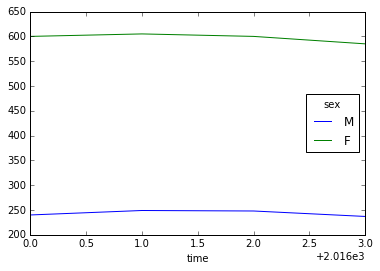

In [175]:
d = c.transpose(x.time).plot()

# Misc other interesting methods

In [176]:
# let us take some small test data
b = a[10:12]
b

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   80 |    0 |    0 |    0
 10 |        F |   84 |    0 |    0 |    0
 11 |        M |   88 |   89 |    0 |    0
 11 |        F |   92 |   93 |    0 |    0
 12 |        M |   96 |   97 |   98 |    0
 12 |        F |  100 |  101 |  102 |    0

## where

where can be used to apply some compution depending on a condition

In [177]:
c = where(b < 85, -1, b * 2)

In [178]:
c

age | sex\time | 2016 | 2017 | 2018 | 2019
 10 |        M |   -1 |   -1 |   -1 |   -1
 10 |        F |   -1 |   -1 |   -1 |   -1
 11 |        M |  176 |  178 |   -1 |   -1
 11 |        F |  184 |  186 |   -1 |   -1
 12 |        M |  192 |  194 |  196 |   -1
 12 |        F |  200 |  202 |  204 |   -1

## clip

In [179]:
a = ndrange((sex, time))

In [180]:
a

sex\time | 2016 | 2017 | 2018 | 2019
       M |    0 |    1 |    2 |    3
       F |    4 |    5 |    6 |    7

In [181]:
# values below 2 are set to 2, above 6 set to 6
a.clip(2, 6)

sex\time | 2016 | 2017 | 2018 | 2019
       M |    2 |    2 |    2 |    3
       F |    4 |    5 |    6 |    6

## divnot0

In [182]:
a

sex\time | 2016 | 2017 | 2018 | 2019
       M |    0 |    1 |    2 |    3
       F |    4 |    5 |    6 |    7

In [183]:
b = ones(time)
b[2016] = 0

In [184]:
b

time | 2016 | 2017 | 2018 | 2019
     |  0.0 |  1.0 |  1.0 |  1.0

In [185]:
# dividing by zero normally produces "inf" (for infinite) if the numerator is not zero or "nan" (for not a number) if it is
a / b

sex\time | 2016 | 2017 | 2018 | 2019
       M |  nan |  1.0 |  2.0 |  3.0
       F |  inf |  5.0 |  6.0 |  7.0

In [186]:
# but in some cases, you do not want that. You can use the divnot0 method instead. Using it should be done with care though
# because it can hide a real error in your data.
a.divnot0(b)

sex\time | 2016 | 2017 | 2018 | 2019
       M |  0.0 |  1.0 |  2.0 |  3.0
       F |  0.0 |  5.0 |  6.0 |  7.0

## diff (discrete difference along an axis)

... or how to compute the value increase since the previous year for each year

In [187]:
# let us first recreate some data
bysex = create_sequential(sex, initial=1.5, inc=0.5)

In [188]:
bysex

sex |   M |   F
    | 1.5 | 2.0

In [189]:
a = create_sequential(time, initial=1.0, inc=bysex)

In [190]:
a

sex\time | 2016 | 2017 | 2018 | 2019
       M |  1.0 |  2.5 |  4.0 |  5.5
       F |  1.0 |  3.0 |  5.0 |  7.0

In [191]:
a.diff(x.time)

sex\time | 2017 | 2018 | 2019
       M |  1.5 |  1.5 |  1.5
       F |  2.0 |  2.0 |  2.0

## growth_rate

using the same principle than diff...

In [192]:
bysex

sex |   M |   F
    | 1.5 | 2.0

In [193]:
# but using "mult" this time
a = create_sequential(time, initial=1.0, mult=bysex)

In [194]:
a

sex\time | 2016 | 2017 | 2018 |  2019
       M |  1.0 |  1.5 | 2.25 | 3.375
       F |  1.0 |  2.0 |  4.0 |   8.0

In [195]:
a.growth_rate(x.time)

sex\time | 2017 | 2018 | 2019
       M |  0.5 |  0.5 |  0.5
       F |  1.0 |  1.0 |  1.0

In [196]:
a.growth_rate(x.time) + 1

sex\time | 2017 | 2018 | 2019
       M |  1.5 |  1.5 |  1.5
       F |  2.0 |  2.0 |  2.0

## shift - drop first label of an axis and shift all subsequent labels

In [197]:
a = create_sequential(time, initial=1.0, inc=bysex)

In [198]:
a

sex\time | 2016 | 2017 | 2018 | 2019
       M |  1.0 |  2.5 |  4.0 |  5.5
       F |  1.0 |  3.0 |  5.0 |  7.0

In [199]:
# when shift is applied on an (increasing) time axis, it effectively brings "past" data into the future
a.shift(x.time)

sex\time | 2017 | 2018 | 2019
       M |  1.0 |  2.5 |  4.0
       F |  1.0 |  3.0 |  5.0

In [200]:
# this is mostly useful when you want to do operations between the past and now
# as an example, here is an alternative implementation of the .diff method seen above:
a[2017:] - a.shift(x.time)

sex\time | 2017 | 2018 | 2019
       M |  1.5 |  1.5 |  1.5
       F |  2.0 |  2.0 |  2.0

# Misc other interesting functions

There are a lot more functions available: 
- round, floor, ceil, trunc, 
- exp, log, log10, 
- sqrt, absolute, nan_to_num, isnan, isinf, inverse,
- sin, cos, tan, arcsin, arccos, arctan
- ...
- and many many more...


## more Excel IO

In [201]:
a = ndrange((sex, time))
wb = open_excel('c:/tmp/test.xlsx')

In [202]:
# put a at A1 in Sheet1, excluding headers (labels)
wb['Sheet1'] = a

In [203]:
# dump a at A1 in Sheet2, including headers (labels)
wb['Sheet2'] = a.dump()

In [204]:
# save the file to disk
wb.save()

In [205]:
# close it
wb.close()

In [206]:
wb = open_excel('c:/tmp/test.xlsx')
# load a from the data starting at A1 in Sheet1, assuming the absence of headers.
a1 = wb['Sheet1']

In [207]:
a1

In [208]:
# load a from the data starting at A1 in Sheet1, assuming the presence of (correctly formatted) headers.
a2 = wb['Sheet2'].load()

In [209]:
a2

sex\time | 2016 | 2017 | 2018 | 2019
       M |    0 |    1 |    2 |    3
       F |    4 |    5 |    6 |    7

In [210]:
wb.close()

In [211]:
wb = open_excel('c:/tmp/test.xlsx')

In [212]:
# note that Sheet2 must exist
sheet2 = wb['Sheet2']

In [213]:
# write a without labels starting at C5
sheet2['C5'] = a

In [214]:
# write a with its labels starting at A10
sheet2['A10'] = a.dump()

In [215]:
wb.save()

In [216]:
# load an array with its axes information from a range. 
# As you might have guessed, we could also use the sheet2 variable here
b = wb['Sheet2']['A10:D12'].load()

In [217]:
b

sex\time | 2016 | 2017 | 2018
       M |    0 |    1 |    2
       F |    4 |    5 |    6

In [218]:
# load an array (raw data) with no axis information from a range. 
c = sheet2['B11:D12']

In [219]:
# in fact, this is not really an LArray ...
type(c)

larray.excel.Range

In [220]:
# ... but it can be used as such (this is currently very experimental)
c.sum(axis=0)

{0}* |   0 |   1 |   2
     | 4.0 | 6.0 | 8.0

In [221]:
# ... and it can be used for other stuff, like setting the formula instead of the value:
c.formula = '=D10+1'

In [222]:
# in the future, we should also be able to set font name, size, style, etc.

In [223]:
wb.close()

# Sessions

In [224]:
a = ndrange([sex, time])

In [225]:
a

sex\time | 2016 | 2017 | 2018 | 2019
       M |    0 |    1 |    2 |    3
       F |    4 |    5 |    6 |    7

In [226]:
# you can group several arrays in a Session
s1 = Session()
s1.a = a
s1.b = zeros_like(a)
s1.c = ones_like(a)

In [227]:
# view(s1)

### the advantage of sessions is that you can manipulate all of the arrays in them in one shot

In [228]:
pwd

'C:\\Users\\gdm\\devel\\larray\\doc\\notebooks'

In [229]:
s1.a

sex\time | 2016 | 2017 | 2018 | 2019
       M |    0 |    1 |    2 |    3
       F |    4 |    5 |    6 |    7

In [230]:
# this saves all the arrays in a single excel file (each array on a different sheet)
s1.dump('test.xlsx')

In [231]:
# this saves all the arrays in a single HDF5 file (which is a very fast format)
s1.dump('test.h5')

In [232]:
# this creates a session out of all arrays in the .h5 file
s2 = Session('test.h5')

In [233]:
s2

Session(a, b, c)

In [234]:
# the excel version does not work currently (axes are not detected properly)
s3 = Session('test.xlsx')

In [235]:
# view(s2)

In [236]:
s1 == s2

name |    a |    b |    c
     | True | True | True

In [237]:
# let us introduce a difference (a variant, or a mistake perhaps)
s2.b['F', 2018:] = 1

In [238]:
s1 == s2

name |    a |     b |    c
     | True | False | True

In [239]:
s1_diff = s1[s1 != s2]

In [240]:
s1_diff

Session(b)

In [241]:
s2_diff = s2[s1 != s2]

In [242]:
s2_diff

Session(b)

In [243]:
# this a bit experimental but can be usefull nonetheless
compare(s1_diff[0], s2_diff[0])